# Binary Sentiment Analysis of French Movie Reviews

### Objectives
1. Text cleaning
2. Text preprocessing for custom embedding Neural Network
3. Train RNN model for sentiment analysis

⚠️ This notebook will be your final deliverable. 
- Make sure it can run "restart and run all"
- Delete useless code cells
- Do not "clear output"

# 0. Load data

Our dataset contains 30,000 french reviews of movies, along with the binary class 1 (positive) or 0 (negative) score

In [1]:
import pandas as pd
import numpy as np

In [2]:
# We load the dataset for you
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies.csv')
data

,review,polarity
0,Ça commence à devenir énervant d'avoir l'impre...,0
1,"J'ai aimé ce film, si il ressemble a un docume...",1
2,Une grosse merde ce haneke ce faire produire p...,0
3,"Beau mélodrame magnifiquement photographié, ""V...",1
4,A la poursuite du diamant vers est un film pro...,1
...,...,...
29946,Le meilleur film de super-héros derrière le ba...,1
29947,Un drame qui est d'une efficacité remarquable....,1
29948,"Une daube hollywoodienne de plus, aucun intérê...",0
29949,Et voilà un nouveau biopic sur la star du X Li...,0


In [3]:
# We create features
y = data.polarity
X = data.review

# We analyse class balance
print(pd.value_counts(y))

1    15051
0    14900
Name: polarity, dtype: int64


In [4]:
# We check various reviews
print(f'polarity: {y[0]} \n')
print(X[0])

polarity: 0 

Ça commence à devenir énervant d'avoir l'impression de voir et revoir le même genre de film à savoir : la comédie romantique, surement le genre le plus prolifique de le production française actuelle. Le problème c'est que l'on a souvent affaire à des niaiseries de faible niveau comme celui ci. Avec un scenario ultra balisé et conventionnel, c'est à se demander comment ça peut passer les portes d'un producteur. Bref cette sempiternel histoire d'un homme mentant au nom de l'amour pour reconquérir une femme et qui à la fin se prend son mensonge en pleine figure est d'une originalité affligeante, et ce n'est pas la présence au casting de l'ex miss météo Charlotte Le Bon qui rêve surement d'avoir la même carrière que Louise Bourgoin qui change la donne.


# 1. Clean Text

❓ We need to give a _quick & dirty_ cleaning to all the sentences in the dataset. Create a variable `X_clean` of similar shape, but with the following cleaning:
- Replace french accents by their non-accentuated equivalent using the [unidecode.unidecode()](https://pypi.org/project/Unidecode/) method
- Reduce all uppercases to lowercases
- Remove any characters outside of a-z, for instance using `string.isalpha()`

😌 You will be given the solution `X_clean` in the next question to make sure you can complete the challenge

In [5]:
### YOUR CODE
import unicodedata
import string

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_ponctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text.strip() 

def lower_and_clean(input_str):
    return u" ".join([w.lower() for w in input_str.split() if w.isalpha()])

In [6]:
r1 = remove_accents(X[3])
r1

'Beau melodrame magnifiquement photographie, "Veronika Voss" est aussi un bel hommage a l\'Hollywood d\'antan et au chef-d\'oeuvre de Billy Wilder, "Sunset boulevard". Ce qui frappe toujours, 35 ans apres sa realisation, c\'est la beaute de la mise en scene de Fassbinder, les mouvements de camera toujours a propos et une direction d\'acteurs d\'une grande precision. Encore une fois, le talent proteiforme du cineaste s\'exprime magnifiquement dans une veine melodramatique, a priori eloignee de l\'univers creatif de ses premieres annees, qu\'un socle theatral semble rattacher indeniablement.'

In [7]:
r2 = lower_and_clean(r1)
r2

'beau melodrame magnifiquement est aussi un bel hommage a et au de billy ce qui frappe ans apres sa la beaute de la mise en scene de les mouvements de camera toujours a propos et une direction grande encore une le talent proteiforme du cineaste magnifiquement dans une veine a priori eloignee de creatif de ses premieres socle theatral semble rattacher'

In [8]:
X_clean = X.apply(remove_accents)
X_clean = X_clean.apply(remove_ponctuation)
X_clean = X_clean.apply(lower_and_clean)

In [9]:
X_clean[0]

'ca commence a devenir enervant davoir limpression de voir et revoir le meme genre de film a savoir la comedie romantique surement le genre le plus prolifique de le production francaise actuelle le probleme cest que lon a souvent affaire a des niaiseries de faible niveau comme celui ci avec un scenario ultra balise et conventionnel cest a se demander comment ca peut passer les portes dun producteur bref cette sempiternel histoire dun homme mentant au nom de lamour pour reconquerir une femme et qui a la fin se prend son mensonge en pleine figure est dune originalite affligeante et ce nest pas la presence au casting de lex miss meteo charlotte le bon qui reve surement davoir la meme carriere que louise bourgoin qui change la donne'

In [10]:
X.shape

(29951,)

In [11]:
X_clean.shape

(29951,)

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('C14',
    shape = X_clean.shape,
    first_sentence = X_clean[0]
)
result.write()

# 2. Preprocess data

Now that we have clean sentences, we need to convert each one into a list of integers of fixed size
- For example, the sentence: `"this was good"` should become something like `array([1, 3, 18, 0, 0, 0, ...0], dtype=int32)` where each integer match to a each _unique_ word in your corpus of sentences.

❓ Create a numpy ndarray `X_input` of shape (29951, 100) that will be the direct input to your Neutral Network. 

- 29951 represents the number of reviews in the dataset `X_clean`
- 100 represents the maximum number of words to keep for each movie review.
- It must contain only numerical values, without any `NaN`
- In the process, compute and save the number of _unique_ words in your cleaned corpus under `vocab_size` variable

👉 First, you **must** start back from the clean solution below (14Mo)

In [13]:
X_clean = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies_X_clean.csv")['review']
X_clean.values

array(['ca commence a devenir enervant de voir et revoir le meme genre de film a savoir la comedie romantique surement le genre le plus prolifique de le production francaise actuelle le probleme que a souvent affaire a des niaiseries de faible niveau comme celui ci avec un scenario ultra balise et conventionnel a se demander comment ca peut passer les portes producteur bref cette sempiternel histoire homme mentant au nom de pour reconquerir une femme et qui a la fin se prend son mensonge en pleine figure est originalite affligeante et ce pas la presence au casting de miss meteo charlotte le bon qui reve surement la meme carriere que louise bourgoin qui change la donne',
       'aime ce film si il ressemble a un documentaire voit a la tete pendant le film je me demandais vont leur arriver par la suite',
       'une grosse merde ce haneke ce faire produire par des francais et pares dire non aux cesar parce que moins classe que les oscars ce que je comprends parce que les cesars vraiment 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(ngram_range = (2,2), max_features=100)
tf_idf_vectorizer.fit(X_clean)

TfidfVectorizer(max_features=100, ngram_range=(2, 2))

In [15]:
X_input = tf_idf_vectorizer.transform(X_clean)
X_input = X_input.toarray()

In [16]:
X_input.shape

(29951, 100)

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('C1415',
    type_X = type(X_input),
    shape = X_input.shape, 
    input_1 = X_input[1], 
)
result.write()

# 3. Neural Network

❓Create and fit a Neural Netork that takes `X_input` and `y` as input, to binary classify each sentence's sentiment

- You cannot use transfer learning or other pre-existing Word2Vec models
- You must use a "recurrent" architecture to _capture_ a notion of order in the sentences' words
- The performance metrics for this task is "accuracy"
- Store your model in a variable `model` 
- Store the result your `model.fit()` in a variable `history`. 
- ⚠️ `history.history` must comprises a measure of the `val_accuracy` at each epoch.
- You don't need to cross-validate your model

😌 Don't worry, you will not be judged on your computer power: You should be able to reach accuracy significantly better than baseline in less than 3 minutes even without GPUs.

👉 But first, you **must** start back from the solution below (70Mo)

In [18]:
url = 'https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/movies_X_input.csv'
X_input = np.genfromtxt(url, delimiter=',', dtype='int32')

In [19]:
X_input.shape

(29951, 100)

In [20]:
X_input[0]

array([15, 16, 17, 18, 10, 12, 10, 19, 20,  6, 10, 21, 22, 23, 10, 24, 25,
        3, 26, 27,  3, 28, 29,  6, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        8, 40,  3, 41, 42, 43,  1, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56,  6, 57, 58, 59, 60,  8, 61,  3, 15, 62, 41, 63, 64, 65,
       66, 67, 68, 69, 70, 71,  8, 72, 73, 15, 74, 55, 75,  6, 76, 77, 78,
       10, 79, 61, 80, 18, 15, 11, 81, 25, 82, 83, 61, 84, 15, 85],
      dtype=int32)

In [21]:
y.shape

(29951,)

In [22]:
vocab_size = len(np.unique(X_input))
vocab_size

54073

In [23]:
X_input.max()

62379

In [24]:
## YOUR CODE
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Embedding(input_dim=80_000, output_dim=100))
    model.add(layers.LSTM(10))
    model.add(layers.Dense(5))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

model = init_model()

In [25]:
history = model.fit(X_input, y, 
          epochs=10, 
          batch_size=16,
          validation_split=0.3,
         )

Epoch 1/10
1311/1311 [==============================] - 92s 68ms/step - loss: 0.5801 - accuracy: 0.6640 - val_loss: 0.3421 - val_accuracy: 0.8781
Epoch 2/10
1311/1311 [==============================] - 81s 61ms/step - loss: 0.2953 - accuracy: 0.9047 - val_loss: 0.3016 - val_accuracy: 0.8933
Epoch 3/10
1311/1311 [==============================] - 79s 60ms/step - loss: 0.2309 - accuracy: 0.9281 - val_loss: 0.2681 - val_accuracy: 0.8786
Epoch 4/10
1311/1311 [==============================] - 80s 61ms/step - loss: 0.1821 - accuracy: 0.9352 - val_loss: 0.3035 - val_accuracy: 0.8574
Epoch 5/10
1311/1311 [==============================] - 69s 53ms/step - loss: 0.1675 - accuracy: 0.9424 - val_loss: 0.4093 - val_accuracy: 0.8786
Epoch 6/10
1311/1311 [==============================] - 81s 62ms/step - loss: 0.1443 - accuracy: 0.9549 - val_loss: 0.3110 - val_accuracy: 0.8987
Epoch 7/10
1311/1311 [==============================] - 77s 58ms/step - loss: 0.1266 - accuracy: 0.9577 - val_loss: 0.2834 -

In [26]:
from nbresult import ChallengeResult
result = ChallengeResult('C1517',
                         history=history.history)
result.write()

In [27]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

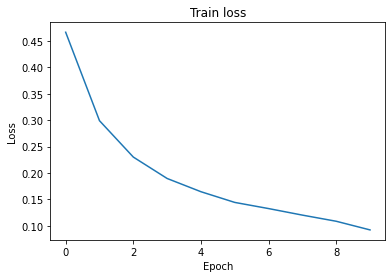

In [28]:
import matplotlib.pyplot as plt
plot_history(history)